In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
import tensorflow as tf

Below Is the code to plot he final training and validation metrics


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json

from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import InceptionResNetV2,ResNet152V2,VGG16,VGG19,ResNet50,MobileNetV2,EfficientNetB2,Xception,NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Dropout



In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.1,
)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.1)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )



In [4]:
train_dataset  = train_datagen.flow_from_directory(directory = '/kaggle/input/co-ferg-db/FERG_DB_WITH_TEST/train',
                                                   target_size = (92,92),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 29094 images belonging to 7 classes.


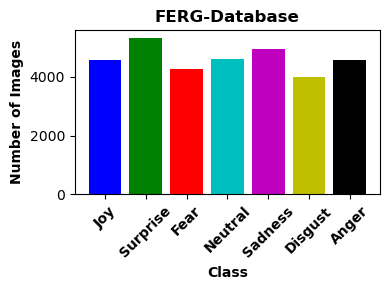

In [7]:
import os
import matplotlib.pyplot as plt

def plot_class_histogram(folder_path, plot_width, plot_height):
    class_counts = {}

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    plt.figure(figsize=(plot_width, plot_height))


    for idx, class_name in enumerate(os.listdir(folder_path)):
        class_dir = os.path.join(folder_path, class_name)


        if os.path.isdir(class_dir):
            image_count = len(os.listdir(class_dir))
            class_counts[class_name] = image_count

 
            color = colors[idx % len(colors)]

            class_name_display = class_name.capitalize()

            plt.bar(class_name_display, image_count, color=color)

    plt.xlabel('Class', fontweight='bold')
    plt.ylabel('Number of Images', fontweight='bold')
    plt.title('FERG-Database', fontweight='bold')
    plt.xticks(rotation=45, fontweight='bold')
    plt.tight_layout()
    plt.show()


folder_path = '/kaggle/input/co-ferg-db/FERG_DB_WITH_TEST/train'

plot_width = 4  
plot_height = 3 

plot_class_histogram(folder_path, plot_width, plot_height)


In [5]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/kaggle/input/co-ferg-db/FERG_DB_WITH_TEST/train',
                                                  target_size = (92,92),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 32)

Found 3228 images belonging to 7 classes.


In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

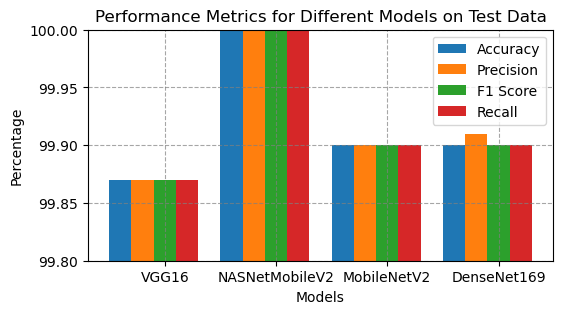

In [11]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['VGG16', 'NASNetMobileV2', 'MobileNetV2', 'DenseNet169']

# Metrics for each model
accuracies = [0.9987, 1.00, 0.9990, 0.9990]
precision = [0.9987, 1.0, 0.9990, 0.9991]
f1score = [0.9987, 1.0, 0.9990, 0.9990]
recall = [0.9987, 1.00, 0.9990, 0.9990]

# Convert accuracies to percentages
accuracies_percentage = [acc * 100 for acc in accuracies]
precision_percentage = [acc * 100 for acc in precision]
f1score_percentage = [acc * 100 for acc in f1score]
recall_percentage = [acc * 100 for acc in recall]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 3))

# Bar width
bar_width = 0.2
index = np.arange(len(model_names))

# Plot bars
bar1 = ax.bar(index - bar_width, accuracies_percentage, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision_percentage, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, f1score_percentage, bar_width, label='F1 Score')
bar4 = ax.bar(index + 2 * bar_width, recall_percentage, bar_width, label='Recall')

# Set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Percentage')
ax.set_title('Performance Metrics for Different Models on Test Data')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names)
ax.legend()

# Set y-axis limits
ax.set_ylim(99.8, 100)

# Add grid lines to the background
ax.grid(True, linestyle='--', alpha=0.7, color='grey')

# Show the plot
plt.show()


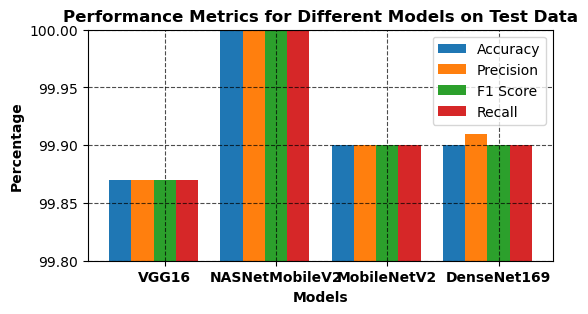

In [10]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['VGG16', 'NASNetMobileV2', 'MobileNetV2', 'DenseNet169']

# Metrics for each model
accuracies = [0.9987, 1.00, 0.9990, 0.9990]
precision = [0.9987, 1.0, 0.9990, 0.9991]
f1score = [0.9987, 1.0, 0.9990, 0.9990]
recall = [0.9987, 1.00, 0.9990, 0.9990]

# Convert accuracies to percentages
accuracies_percentage = [acc * 100 for acc in accuracies]
precision_percentage = [acc * 100 for acc in precision]
f1score_percentage = [acc * 100 for acc in f1score]
recall_percentage = [acc * 100 for acc in recall]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 3))

# Bar width
bar_width = 0.2
index = np.arange(len(model_names))

# Plot bars
bar1 = ax.bar(index - bar_width, accuracies_percentage, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision_percentage, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, f1score_percentage, bar_width, label='F1 Score')
bar4 = ax.bar(index + 2 * bar_width, recall_percentage, bar_width, label='Recall')

# Set labels, title, and legend with bold and dark black text
ax.set_xlabel('Models', fontweight='bold', color='black')
ax.set_ylabel('Percentage', fontweight='bold', color='black')
ax.set_title('Performance Metrics for Different Models on Test Data', fontweight='bold', color='black')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, fontweight='bold', color='black')
ax.legend()

# Set y-axis limits
ax.set_ylim(99.8, 100)

# Add grid lines to the background with bold and dark black lines
ax.grid(True, linestyle='--', alpha=0.7, color='black', linewidth=0.8)

# Show the plot
plt.show()


In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),

      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 5,verbose = 1,factor = 0.1, min_lr = 1e-6)

mcp = ModelCheckpoint('model.h5')


es = EarlyStopping(verbose=1, patience=20)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score



# Load the model from the .h5 file, providing the custom metric function
model = tf.keras.models.load_model('/kaggle/input/ferg-db-with-models/FERG_DB_256/my_model_vgg16_ferg_db.h5', custom_objects={'f1_score': f1_score})

# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score


# Load the model from the .h5 file, providing the custom metric function
model0 = tf.keras.models.load_model('/kaggle/input/models/models/my_model_vgg16_ferg_db_comp.h5', custom_objects={'f1_score': f1_score})


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have y_test and Y_pred
# y_test is the true labels, and Y_pred is the predicted labels

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')
accuracy = accuracy_score(y_test, Y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


In [14]:
base1 =DenseNet169(include_top=False, weights='imagenet',input_shape=(92,92,3))

51877672/51877672 [==============================] - 2s 0us/step


In [ ]:
base1.summary()

In [ ]:
base2 = MobileNetV2(include_top=False, weights='imagenet',input_shape=(92,92,3))

In [ ]:
base3 = VGG16(include_top=False, weights='imagenet',input_shape=(92,92,3))

In [ ]:
base4 = NASNetMobile(include_top=False, weights='imagenet',input_shape=(92,92,3))

In [ ]:
layers_to_train = ['bn','Conv_1','conv5_block32_2_conv','conv5_block32_1_bn','conv5_block32_1_conv','conv5_block32_0_bn','conv5_block31_2_conv','conv5_block31_1_bn','conv5_block31_1_conv','conv5_block31_0_bn']

for layer in base1.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
layers_to_train = ['Conv_1_bn','Conv_1','batch_normalization_93','batch_normalization_92','block_16_project','block_16_depthwise_BN','block_16_depthwise','block_16_expand_BN','block_16_expand']

for layer in base2.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
layers_to_train = ['block5_conv3','block5_conv2','block5_conv1']

for layer in base3.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
layers_to_train = ['separable_conv_2_bn_normal_lef5_12','separable_conv_2_bn_normal_right2_12','separable_conv_2_bn_normal_left2_12','separable_conv_2_bn_normal_right1_12','separable_conv_2_bn_normal_left1_12','separable_conv_2_normal_lef5_12','separable_conv_2_normal_right2_12','separable_conv_2_normal_left2_12','separable_conv_2_normal_right1_12','separable_conv_2_normal_left1_12']

for layer in base4.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
layers_to_train = ['Conv_1_bn','Conv_1','batch_normalization_93','batch_normalization_92','block_16_project','block_16_depthwise_BN','block_16_depthwise','block_16_expand_BN','block_16_expand']

for layer in base2.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
layers_to_train = ['bn','Conv_1','conv5_block32_2_conv','conv5_block32_1_bn','conv5_block32_1_conv','conv5_block32_0_bn','conv5_block31_2_conv','conv5_block31_1_bn','conv5_block31_1_conv','conv5_block31_0_bn']

for layer in base1.layers:
    if any(layer_name in layer.name for layer_name in layers_to_train):
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:


model=Sequential()
model.add(base1)
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Conv2D(64, (1, 1), activation='relu'))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(32,kernel_initializer='he_uniform'))

model.add(Activation('relu'))
model.add(Dense(16,kernel_initializer='he_uniform'))

model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

In [ ]:

mode2=Sequential()
mode2.add(base2)
mode2.add(Conv2D(32, (2, 2), activation='relu'))
mode2.add(Conv2D(64, (1, 1), activation='relu'))

mode2.add(BatchNormalization())
mode2.add(Flatten())

model2.add(Dense(32,kernel_initializer='he_uniform'))

model2.add(Activation('relu'))
model2.add(Dense(16,kernel_initializer='he_uniform'))

model2.add(Activation('relu'))
model2.add(Dense(7,activation='softmax'))
model2.summary()

In [ ]:

model3=Sequential()
model3.add(base3)
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(Conv2D(64, (1, 1), activation='relu'))

model3.add(BatchNormalization())
model.add(Flatten())

model3.add(Dense(32,kernel_initializer='he_uniform'))

model3.add(Activation('relu'))
model3.add(Dense(16,kernel_initializer='he_uniform'))

model3.add(Activation('relu'))
model3.add(Dense(7,activation='softmax'))
model3.summary()

In [ ]:

model4=Sequential()
model4.add(base4)
model4.add(Conv2D(32, (2, 2), activation='relu'))
model4.add(Conv2D(64, (1, 1), activation='relu'))

model4.add(BatchNormalization())
model4.add(Flatten())

model4.add(Dense(32,kernel_initializer='he_uniform'))

model4.add(Activation('relu'))
model4.add(Dense(16,kernel_initializer='he_uniform'))

model4.add(Activation('relu'))
model4.add(Dense(7,activation='softmax'))
model4.summary()

In [ ]:
momentum_value = 0.9
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=momentum_value, nesterov=True)


In [ ]:
from sklearn.utils import compute_class_weight
train_labels = train_dataset.classes
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels                                                    
                                    )
class_weights = dict(zip(np.unique(train_labels), class_weights))
class_weights



In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=METRICS)


In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 100,verbose = 1,callbacks=[lrd,mcp],batch_size= 32)



In [ ]:
model.save('my_model_densenet_ferg_db_comp_large.h5')

In [ ]:
import pickle

# Assuming history is already defined and populated

# Define a dictionary to store the history
training_history = {
    'train_acc': history.history['accuracy'],
    'val_acc': history.history['val_accuracy'],
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Specify the file path where you want to save the history
file_path = "/kaggle/working/"

# Save the history to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(training_history, file)

print("Training history saved successfully.")


In [ ]:
import os
import pickle

# Assuming history is already defined and populated

# Define a dictionary to store the history
training_history = {
    'train_acc': history.history['accuracy'],
    'val_acc': history.history['val_accuracy'],
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Specify the directory path where you want to save the file
directory_path = "/kaggle/working/"
# Ensure that the directory exists, if not create it
os.makedirs(directory_path, exist_ok=True)

# Specify the file name
file_name = "training_history_mobilenet.pkl"

# Specify the complete file path
file_path = os.path.join(directory_path, file_name)

# Save the history to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(training_history, file)

print("Training history saved successfully.")


In [ ]:
import os

# Specify the file path
file_path = "/kaggle/working/training_history.pkl"

# Check if the file exists
if os.path.exists(file_path):
    print("The file exists.")
else:
    print("The file does not exist.")


In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [6]:
test_generator= test_datagen.flow_from_directory(directory = '/kaggle/input/co-ferg-db/FERG_DB_WITH_TEST/test',
                                                  target_size = (92,92),
                                                  class_mode = 'categorical',
                                                   

                                                  batch_size = 128,
                                                  shuffle = False
                                                  )

Found 8078 images belonging to 7 classes.


In [ ]:
num_of_test_samples=8078
batch_size = 128

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
epochs = range(1, len(train_acc) + 1)

In [ ]:
y_test = np.array(test_generator.classes)[test_generator.index_array]

Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1,workers=0)
Y_pred = np.argmax(Y_pred, axis=1)

y_test.shape


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, Y_pred))
print("======================================================================")
print('Classification Report using vgg16')
target_names=['anger','disgust','fear','joy','neutral','sadness','surprise']
print(classification_report(test_generator.classes, Y_pred, target_names=target_names))








labels = ['Anger','Disgust','Fear','Neutral','Joy','Sadness','Surprise']


cm = confusion_matrix(y_test, Y_pred)   

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix using VGG16')
plt.show()
print('==========================================================')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt

# Assuming you have y_test and Y_pred
# y_test is the true labels, and Y_pred is the predicted labels

# Calculate precision and recall
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds_r)
plt.title('Confusion Matrix')
plt.show()


In [ ]:


# Extract the training and validation metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import pickle

# Assuming 'history' is your history object containing metrics

# Save the history object
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [ ]:


#setting the size of the figures
fig, ax = plt.subplots(1,3,figsize=(18, 3))

#plotting the accuracy
ax[0].plot(epochs, train_acc, label='Training')
ax[0].plot(epochs, val_acc, label='Validation')
ax[0].set_xlabel('Number of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('NASNetMobile Model')
ax[0].legend()
ax[0].legend(prop={'size': 9})

#plotting the loss
ax[1].plot(epochs, train_loss, label='Training')
ax[1].plot(epochs, val_loss, label='Validation')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('VGG16 Model')
ax[1].legend()
ax[1].legend(prop={'size': 9})

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax[2],xticks_rotation='vertical',cmap='BuPu')
disp.im_.colorbar.remove()
fig = disp.ax_.get_figure()
fig.set_figwidth(9)
fig.set_figheight(2.3)
ax[2].set_xlabel('Predicted labels')
#ax[2].set_ylabel('True labels')
ax[2].set_title('Confusion Matrix')
plt.subplots_adjust(hspace=0.5, wspace=0.27)
ax1 = ax[1].get_position()
ax2 = ax[2].get_position()
ax[1].set_position([ax1.x0,ax1.y0,ax1.width,ax1.height])
ax[2].set_position([.76,ax2.y0,.2,.8])
plt.show()